# CS 416 - Algorithms for Machine Learning: Fall 2018
## Assignment 02: Denoising Autoencoder

**Tasks**
- Load the MNIST data.
- Design a convolution autoencoder for denoising with at least 2‐encoder and 2‐decoder layers.
- Add Noise to each input batch during training (function torch.rand() my be helpful).
- Report the loss after each epoch.
- Select randomly 10 images from the test set. Add noise to it and run it on the trained network.
Plot the images before noise addition, after the noise addition and the output images from the
network. The grading of the code will be based on how well the noise has been removed from
the images.

- **Please report the results with following hyperparameters.**
- Play with different configuration of convolution autoencoders.
- Try different learning rate 0.00001, 0.0001, 0.001, 0.01, 0.1.
- Try different number of epochs 10, 100, 500, 1000.
- Try batch sizes of 16, 32, 64, 128.

# Installing Dependencies

In [0]:
!pip install torch==0.4.0
!pip install torchvision

# Importing Modules

In [0]:
# For model training
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as dataset
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim

# For visualisation
import matplotlib.pyplot as plt

# For array operations
import numpy as np

# Global Variables

In [0]:
batch_size = 32
epochs = 100
learning_rate = 0.1

# Loading Data

In [0]:
# Forming tensors
transforms = transforms.Compose([transforms.ToTensor()])

# Selecting train and test dataset
train_set = dataset.MNIST(root='./data', train=True, download=True, transform=transforms)
test_set = dataset.MNIST(root='./data', train=False, download=True, transform=transforms)

# Loading train and test dataset
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True, num_workers=4)

# Class: Autoencoder

In [0]:
class Autoencoder(nn.Module):
  
  # Initialising encoder and decoder layers
  def __init__(self):
    super(Autoencoder, self).__init__()
    
    # 2-2 Conv-Conv Architecture
    self.encoder1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )
    self.encoder2 = nn.Sequential(
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64),
        nn.MaxPool2d(2, stride=2)
    )
    
    self.decoder1 = nn.Sequential(
        nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )
    
    self.decoder2 = nn.Sequential(
        nn.ConvTranspose2d(in_channels=32, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1),
        nn.ReLU()
    )
      
  # Declaring the forward pass
  def forward(self, x):
    
    # 2-2 Conv-Conv Architecture
    x = self.encoder1(x)
    x = self.encoder2(x)
    x = self.decoder1(x)
    x = self.decoder2(x)

    return x

# Initialising the Model

In [0]:
model = Autoencoder().cuda()

# Defining Optimization Technique

In [0]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Generating Artificial Noise

In [0]:
dataIter = iter(train_loader)
image, _ = dataIter.next()

noise_data = torch.rand(image.size())

# Model Training

In [53]:
dataIter = iter(train_loader)
image, _ = dataIter.next()

for epoch in range(epochs):
  running_loss = 0
  for data in train_loader:
    inputs, _ = data
    noisy_inputs = inputs + noise_data
    inputs = inputs.cuda()
    noisy_inputs = noisy_inputs.cuda()
    optimizer.zero_grad()
    outputs = model(noisy_inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.data[0]
  print("Epoch : %d ; MSE : %f"%(epoch+1, running_loss/(train_set.train_data.size(0)/batch_size)))
print("Finished Training")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch : 1 ; MSE : 0.006023
Epoch : 2 ; MSE : 0.004490
Epoch : 3 ; MSE : 0.004146
Epoch : 4 ; MSE : 0.003909
Epoch : 5 ; MSE : 0.003730
Epoch : 6 ; MSE : 0.003599
Epoch : 7 ; MSE : 0.003482
Epoch : 8 ; MSE : 0.003399
Epoch : 9 ; MSE : 0.003314
Epoch : 10 ; MSE : 0.003246
Epoch : 11 ; MSE : 0.003188
Epoch : 12 ; MSE : 0.003131
Epoch : 13 ; MSE : 0.003080
Epoch : 14 ; MSE : 0.003034
Epoch : 15 ; MSE : 0.002994
Epoch : 16 ; MSE : 0.002948
Epoch : 17 ; MSE : 0.002916
Epoch : 18 ; MSE : 0.002887
Epoch : 19 ; MSE : 0.002859
Epoch : 20 ; MSE : 0.002834
Epoch : 21 ; MSE : 0.002806
Epoch : 22 ; MSE : 0.002776
Epoch : 23 ; MSE : 0.002758
Epoch : 24 ; MSE : 0.002735
Epoch : 25 ; MSE : 0.002717
Epoch : 26 ; MSE : 0.002697
Epoch : 27 ; MSE : 0.002680
Epoch : 28 ; MSE : 0.002659
Epoch : 29 ; MSE : 0.002647
Epoch : 30 ; MSE : 0.002630
Epoch : 31 ; MSE : 0.002612
Epoch : 32 ; MSE : 0.002603
Epoch : 33 ; MSE : 0.002586
Epoch : 34 ; MSE : 0.002574
Epoch : 35 ; MSE : 0.002558
Epoch : 36 ; MSE : 0.002548
E

# Model Testing and Visualization

In [0]:
dataIter=iter(test_loader)
input_image, _ = dataIter.next()
original_image = input_image.view(-1, 28, 28)

# Adding artificial noise to test batch
noisy_image = input_image + noise_data
noisy_image = noisy_image.cuda()
output_image = model(noisy_image)
output_image=output_image.view(-1, 28, 28)
noisy_image = noisy_image.view(-1, 28, 28)

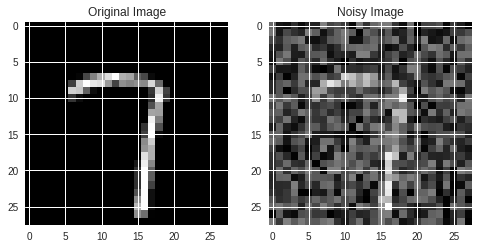

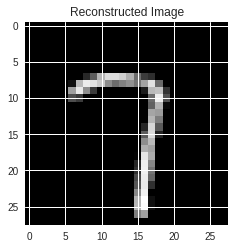

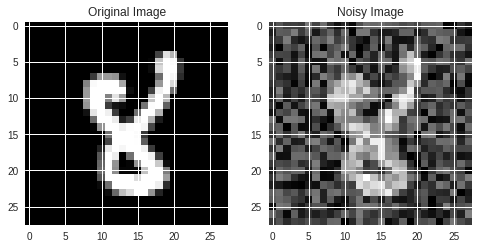

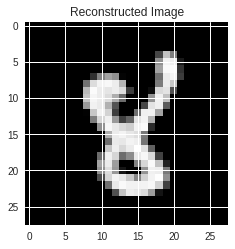

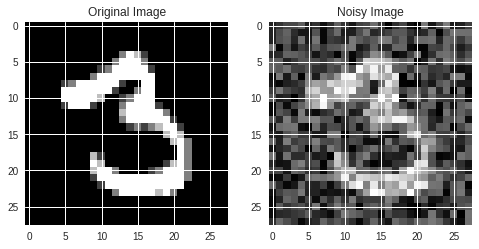

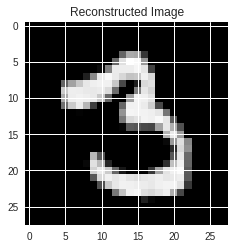

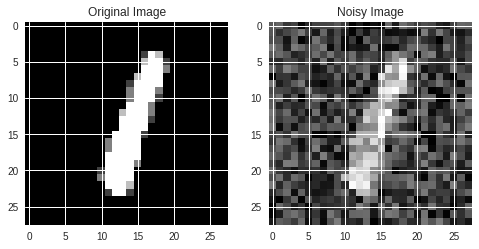

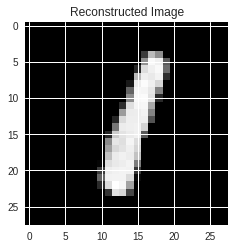

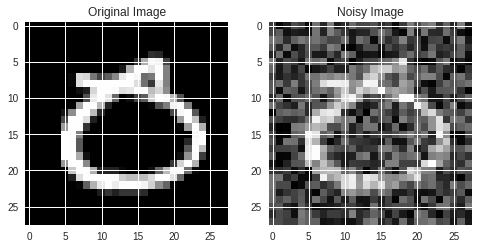

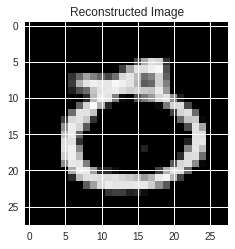

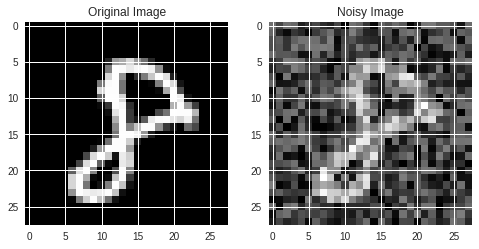

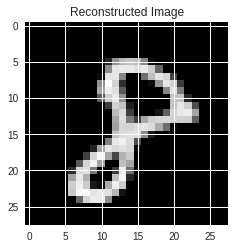

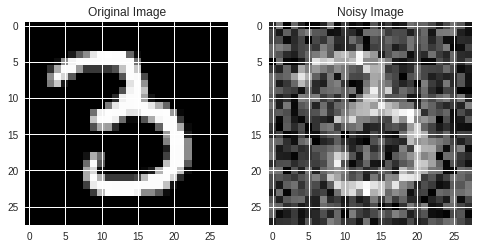

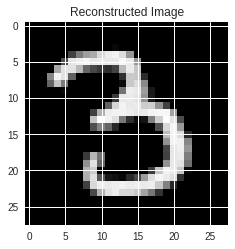

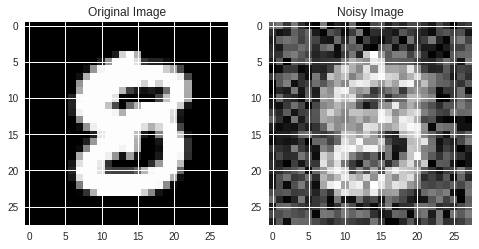

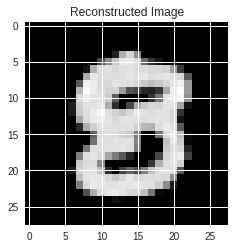

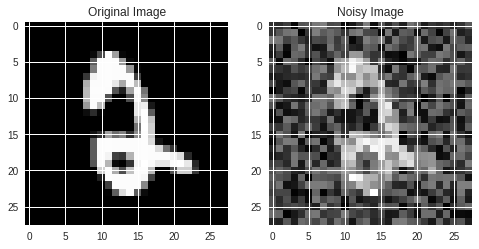

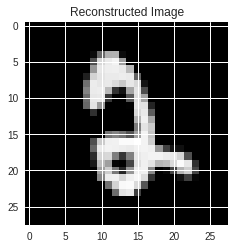

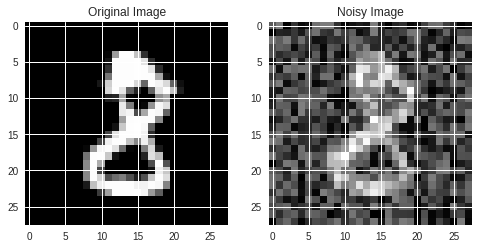

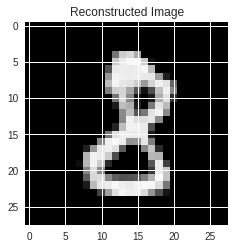

In [55]:
for i in range(10):
  fig = plt.figure()
  
  # Original image
  plot = fig.add_subplot(1, 2, 1)
  img = np.array(original_image[i])
  plot.set_title('Original Image')
  plt.imshow(img, cmap='gray')

  # Noisy image
  plot = fig.add_subplot(1, 2, 2)
  img = np.array(noisy_image[i])
  plot.set_title('Noisy Image')
  plt.imshow(img, cmap='gray')

  # Reconstructed image
  fig = plt.figure()
  plot = fig.add_subplot(1, 2, 1)
  img = output_image.data.cpu()
  plot.set_title('Reconstructed Image')
  plt.imshow(img[i].numpy(), cmap='gray')
  
plt.show()

# Analysis Report

Can be viewed in the file attached.


##### Sources:
The above architecture is inspired from [here](https://github.com/GunhoChoi/Kind-PyTorch-Tutorial/blob/master/07_Denoising_Autoencoder/Denoising_Autoencoder.py).